In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/dsliwka/EEMP2024/refs/heads/main/Data/AMP_Data.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,...,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
0,0,1,0.374976,0.634742,0.000000,3.0,3.00,3.500000,NaN,0,...,18.00,0,1,0,0,0,1,88585.01,403.00003,10828.998
1,1,1,0.626065,0.460456,0.000000,4.0,4.00,3.333333,NaN,0,...,18.00,0,1,0,0,0,1,116900.99,405.00003,9241.004
2,2,1,0.032071,0.286170,4.366278,5.0,5.00,3.166667,NaN,0,...,18.00,0,0,0,0,0,0,103448.01,410.00000,8946.000
3,3,2,0.227196,2.285633,0.000000,4.5,4.50,4.555555,NaN,0,...,15.00,0,0,0,0,0,1,246291.10,670.99994,69757.984
4,4,3,0.213310,1.911630,0.000000,3.5,4.00,4.333333,NaN,0,...,14.00,0,1,0,0,0,1,454517.12,1627.00000,89360.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,7089,2926,0.526407,0.791786,3.919783,2.5,3.75,3.583333,NaN,0,...,19.75,0,0,0,0,0,0,262517.03,1313.00010,60770.004
7090,7090,2926,0.637338,0.808551,3.832232,3.0,3.50,3.611111,NaN,0,...,18.50,0,0,0,0,0,0,279724.94,1303.00020,60550.000
7091,7091,2926,0.355583,0.825316,3.744681,3.5,3.25,3.638889,NaN,0,...,17.25,0,0,0,0,0,0,245282.00,1164.99990,59896.016
7092,7092,2926,0.278019,0.842080,3.657131,4.0,3.00,3.666667,NaN,0,...,16.00,0,0,0,0,0,0,244552.10,1393.99990,67418.016


<Axes: xlabel='management', ylabel='Count'>

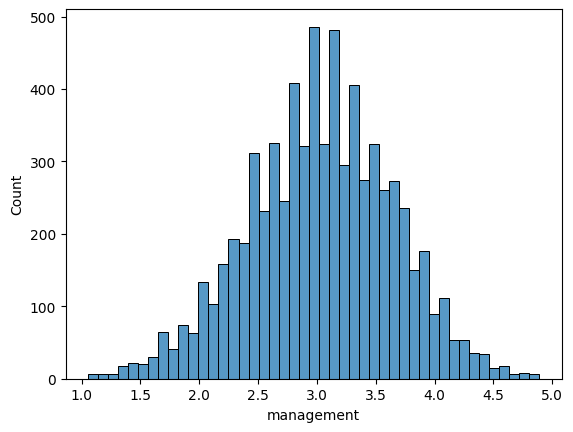

In [ ]:
sns.histplot(df.management)

In [ ]:
df.management.describe()

,management
count,7094.000000
mean,3.028539
std,0.617150
min,1.055556
25%,2.611111
50%,3.055556
75%,3.444444
max,4.888889


<Axes: xlabel='management', ylabel='roce'>

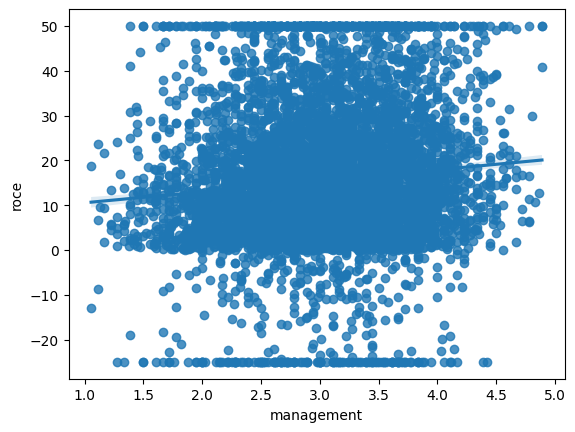

In [ ]:
sns.regplot(df, y='roce', x='management')

In [ ]:
dfagg = df.groupby('country').management.mean().reset_index()
dfagg

,country,management
0,Argentina,3.055555
1,Australia,2.961111
2,Brazil,2.694444
3,Canada,3.055556
4,Chile,3.083333
5,China,2.743358
6,France,3.061611
7,Germany,3.248466
8,Great Britain,3.069062
9,Greece,2.778438


In [ ]:
dfagg.sort_values('management')

,country,management
2,Brazil,2.694444
5,China,2.743358
9,Greece,2.778438
14,Portugal,2.810406
12,Northern Ireland,2.865231
15,Republic of Ireland,2.875156
13,Poland,2.900754
1,Australia,2.961111
10,Italy,2.983833
0,Argentina,3.055555


<Axes: xlabel='management', ylabel='country'>

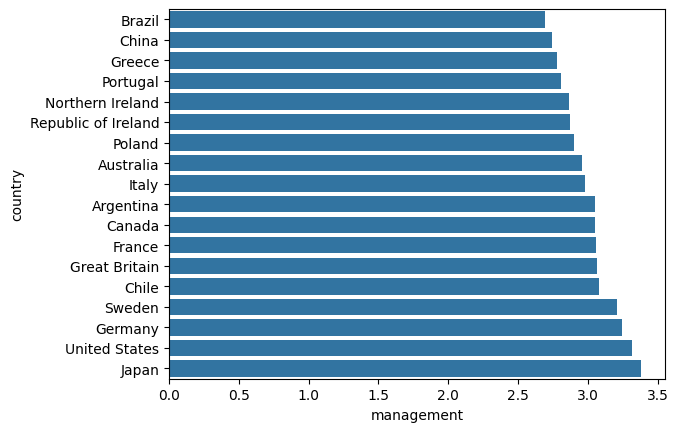

In [ ]:
sns.barplot(dfagg.sort_values('management'), y='country', x='management')

In [4]:
!pip install pyfixest -q


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyfixest as pf

In [6]:
reg1 = pf.feols('roce ~ management', data = df)
reg2 = pf.feols('roce ~ management + emp + ppent', data = df)
pf.etable([reg1, reg2])

GT(_tbl_data=  level_0        level_1                      0                      1
0    coef     management  2.455*** <br> (0.297)  2.512*** <br> (0.299)
1    coef            emp                           0.000* <br> (0.000)
2    coef          ppent                         -0.000** <br> (0.000)
3    coef      Intercept  8.068*** <br> (0.917)  7.954*** <br> (0.919)
4   stats   Observations                   7094                   7094
5   stats      S.E. type                    iid                    iid
6   stats  R<sup>2</sup>                  0.010                  0.011, _body=<great_tables._gt_data.Body object at 0x00000160FFCC7350>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000160FFCDFCE0>, _spanners=Spanners([SpannerInfo(spanner_id='roce', spanner_level=1, spanner_label='roce', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000160FFCC7DA0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='tab

In [8]:
reg2 = pf.feols('roce ~ management + emp + ppent', data = df)
pf.etable([reg1, reg2])

GT(_tbl_data=  level_0        level_1                      0                      1
0    coef     management  2.455*** <br> (0.297)  2.512*** <br> (0.299)
1    coef            emp                           0.000* <br> (0.000)
2    coef          ppent                         -0.000** <br> (0.000)
3    coef      Intercept  8.068*** <br> (0.917)  7.954*** <br> (0.919)
4   stats   Observations                   7094                   7094
5   stats      S.E. type                    iid                    iid
6   stats  R<sup>2</sup>                  0.010                  0.011, _body=<great_tables._gt_data.Body object at 0x00000160FFCDF830>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000160FFCDF410>, _spanners=Spanners([SpannerInfo(spanner_id='roce', spanner_level=1, spanner_label='roce', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000160FFCDDE50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='tab

In [9]:
labels = {"management": "Management Score",
          "roce": "ROCE",
          "emp": "Number of Employees",
          "ppent": "Capital"}
pf.etable([reg1, reg2], labels=labels)

GT(_tbl_data=  level_0              level_1                      0                      1
0    coef     Management Score  2.455*** <br> (0.297)  2.512*** <br> (0.299)
1    coef  Number of Employees                           0.000* <br> (0.000)
2    coef              Capital                         -0.000** <br> (0.000)
3    coef            Intercept  8.068*** <br> (0.917)  7.954*** <br> (0.919)
4   stats         Observations                   7094                   7094
5   stats            S.E. type                    iid                    iid
6   stats        R<sup>2</sup>                  0.010                  0.011, _body=<great_tables._gt_data.Body object at 0x00000160FFCC5E20>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000160FFC5B110>, _spanners=Spanners([SpannerInfo(spanner_id='ROCE', spanner_level=1, spanner_label='ROCE', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000160FFC5B980>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_b

In [10]:
df.country.unique()

array(['United States', 'Argentina', 'Australia', 'Brazil', 'Chile',
       'China', 'Germany', 'France', 'Great Britain', 'Northern Ireland',
       'Greece', 'Republic of Ireland', 'Italy', 'Japan', 'Poland',
       'Portugal', 'Sweden', 'Canada'], dtype=object)

In [11]:
df['dummy_china'] = (df.country == 'China')

In [12]:
dfn = df[df.country.isin(['Great Britain', 'China'])]
dfn.country.unique()

array(['China', 'Great Britain'], dtype=object)

<Axes: xlabel='country', ylabel='management'>

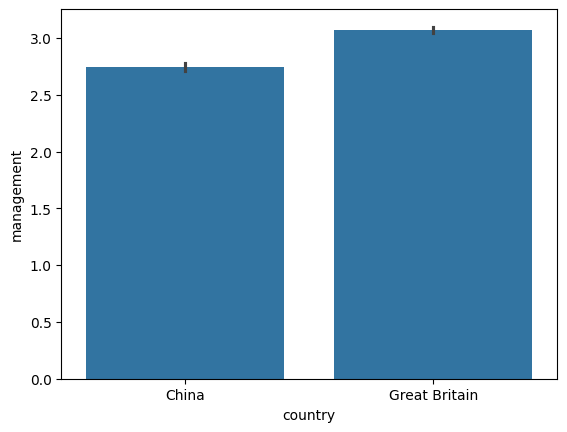

In [13]:
sns.barplot(dfn, y='management', x='country')

In [14]:
reg1 = pf.feols("roce ~ management", data=dfn)
reg2 = pf.feols("roce ~ management * dummy_china", data=dfn)
reg3 = pf.feols("roce ~ management", data=dfn[dfn.country=="Great Britain"])
reg4 = pf.feols("roce ~ management", data=dfn[dfn.country=="China"])

pf.etable([reg1,reg2,reg3,reg4], model_heads=['GB & China', 'GB & China', 'GB', 'China'])

GT(_tbl_data=  level_0                 level_1                       0  \
0    coef              management     1.427* <br> (0.599)   
1    coef             dummy_china                           
2    coef  management:dummy_china                           
3    coef               Intercept  11.187*** <br> (1.821)   
4   stats            Observations                    2203   
5   stats               S.E. type                     iid   
6   stats           R<sup>2</sup>                   0.003   

                       1                      2                       3  
0  2.255*** <br> (0.673)  2.255*** <br> (0.666)     -1.703 <br> (1.591)  
1   12.108* <br> (4.782)                                                 
2   -3.958* <br> (1.686)                                                 
3  8.391*** <br> (2.106)  8.391*** <br> (2.084)  20.500*** <br> (4.420)  
4                   2203                   1628                     575  
5                    iid                    iid                     iid  
6                  0.006                  0.007                   0.002  , _body=<great_tables._gt_data.Body object at 0x00000160FFC19C10>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000160FFCDF560>, _spanners=Spanners([SpannerInfo(spanner_id='roce', spanner_level=2, spanner_label='roce', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None), SpannerInfo(spanner_id='GB & China', spanner_level=1, spanner_label='GB & China', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None), SpannerInfo(spanner_id='GB', spanner_level=1, spanner_label='GB', spanner_units=None, spanner_pattern=None, vars=['2'], built=None), SpannerInfo(spanner_id='China', spanner_level=1, spanner_label='China', spanner_units=None, spanner_pattern=None, vars=['3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000160FFB95C70>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=

<Axes: xlabel='management', ylabel='roce'>

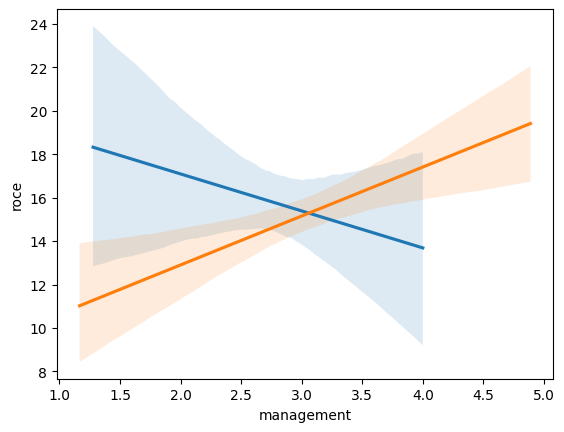

In [18]:
sns.regplot(x="management", y="roce", scatter=False, label="China", data=dfn[dfn.country=="China"])
sns.regplot(x="management", y="roce", scatter=False, label="Great Britain", data=dfn[dfn.country=="Great Britain"])

In [20]:
reg1=pf.feols("roce ~ management", data=df)
reg2=pf.feols("roce ~ management", data=df, vcov="hetero")
reg3=pf.feols("roce ~ management", data=df, vcov={"CRV1":"account_id"})
pf.etable([reg1,reg2, reg3])

GT(_tbl_data=  level_0        level_1                      0                      1  \
0    coef     management  2.455*** <br> (0.297)  2.455*** <br> (0.302)   
1    coef      Intercept  8.068*** <br> (0.917)  8.068*** <br> (0.930)   
2   stats   Observations                   7094                   7094   
3   stats      S.E. type                    iid                 hetero   
4   stats  R<sup>2</sup>                  0.010                  0.010   

                       2  
0  2.455*** <br> (0.395)  
1  8.068*** <br> (1.197)  
2                   7094  
3         by: account_id  
4                  0.010  , _body=<great_tables._gt_data.Body object at 0x0000016083E013D0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000016083DD81D0>, _spanners=Spanners([SpannerInfo(spanner_id='roce', spanner_level=1, spanner_label='roce', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000016083DD8A40>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidde